# Batch-Normalization
* Batch-Normalization (BN) is an algorithmic method which makes the training of Deep Neural Networks (DNN) faster and more stable.
* It consists of normalizing activation vectors from hidden layers using the mean and varience of the current batch. This normalization step is applied right before (or right after) the nonlinear function.
* Important points
    * it applies only with mini-batch gradient decent
    * it applies layer by layer
* Advantages:
    * It makes training more stable, so that we can choose the value of hyperparameter in wider range
    * Training become faster
    * It act as a regularizer
    * it reduces weight initialization impact
* 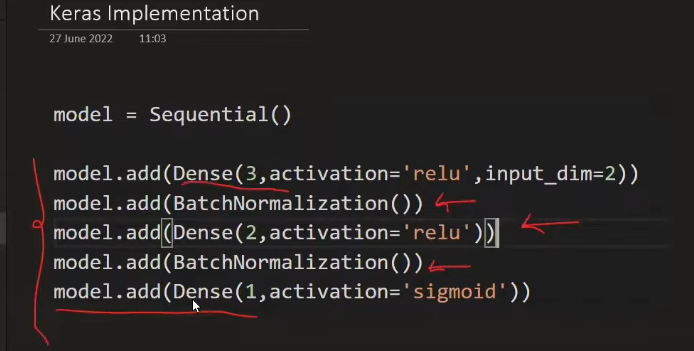

# Optimizers
* Momentum
* AdaGrad
* NAG
* RMSprop
* Adam
### 1. Momentum optimization
* Advantage:
    * It can perform well on this conditions: high curvature, consisten gradient, Noisy gradient(local minima)
### 2. Nag (Nesterov Accelerated Gradient)
* Advantage:
    * same as momentum
* Disadvantage:
    * It stuck in local minima in some datasets
## Method for implementing nag and momentum using keras
* 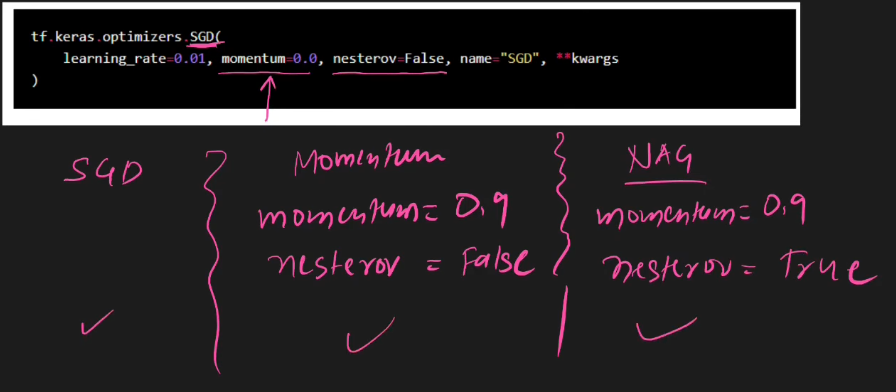

### 3. AdaGrad
* It performs well compared to other methods in certain conditions
    * When input features have different scale
    * if the features are sparse (most of the values are 0)
* Disadvantage:
    * It did't use in complex neural networks but you can use it in linear regression 
    * It did't achieve convergance or it is a non-convergance
    
### 4. RMSProp (Root Mean Square Propogation)
* It is basically a improvement in AdaGrad
* It solved the problem of non-convergance of AdaGrad

### 5. Adam (Adaptive Moment Estimation)
* It is a most powerfull optimization technique

# Exponentially weighted moving average or exponential weighted average (EWMA)
* It is a technique to find out the hidden trend in time series based data
* In it the weight of the current data is higher then the previous data
* and the weights are decreasing according to the time increasing
* 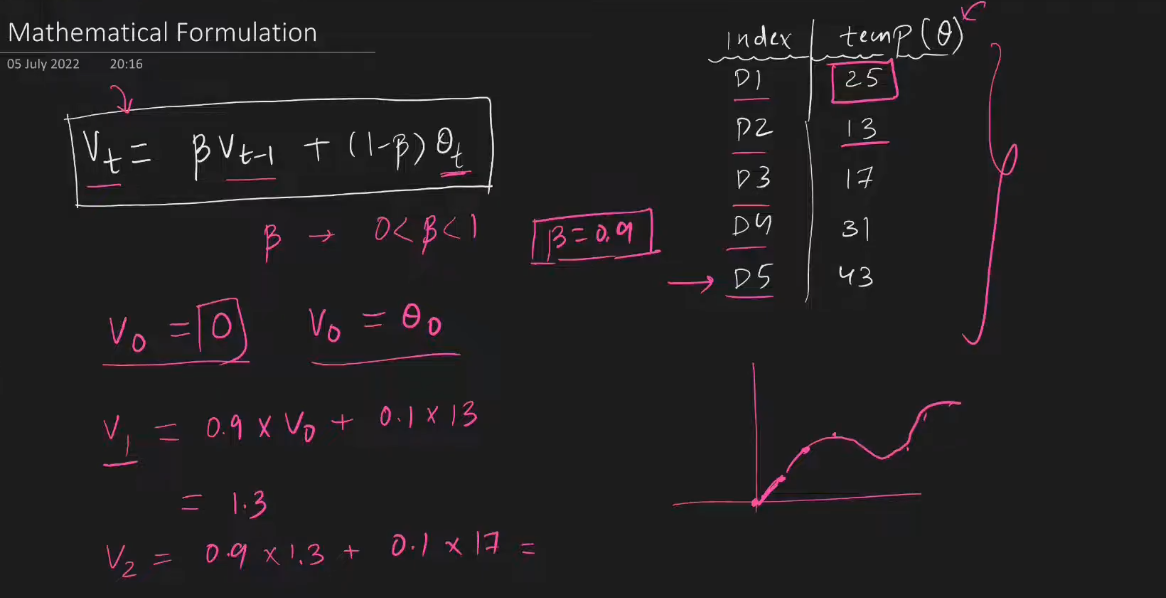 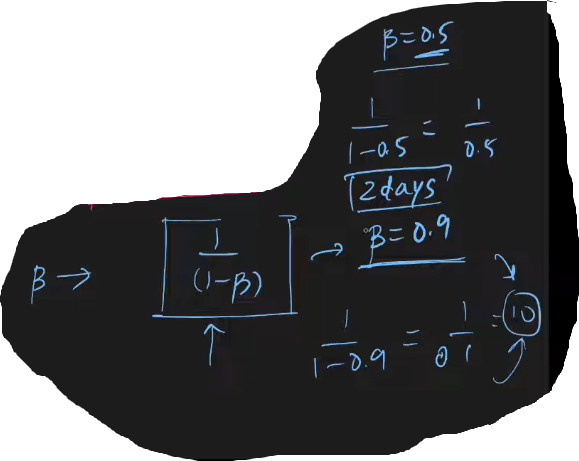
* 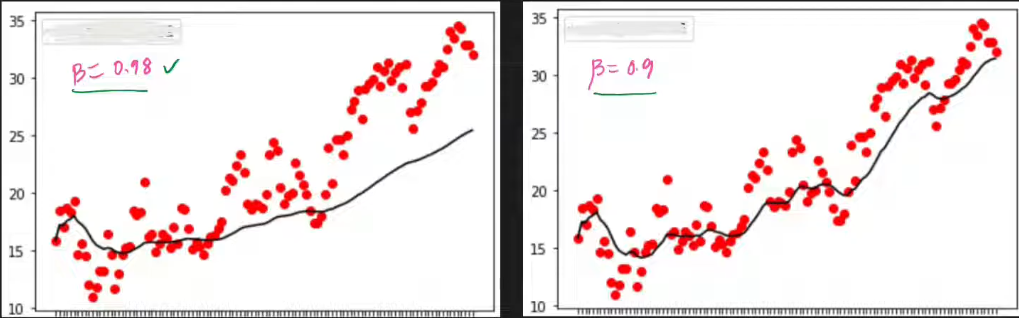 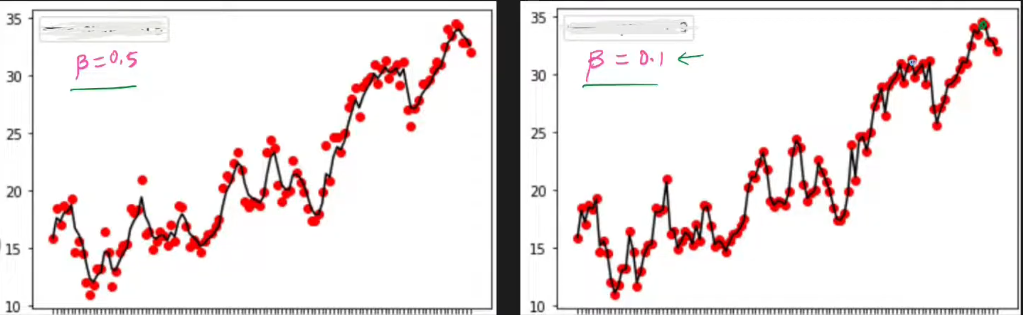

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('../../dataset/DailyDelhiClimateTest.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [19]:
df.drop(columns=['humidity', 'wind_speed', 'meanpressure'],inplace=True)
df.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


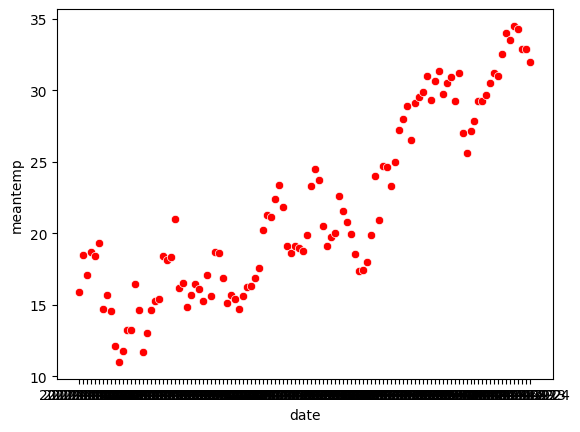

In [20]:
sns.scatterplot(x=df['date'], y=df['meantemp'], color='red')
plt.show()

In [ ]:
x = df['meantemp'].ewm(alpha=0.9).mean() ## alpha=0.9 means beta=0.1
x

0      15.913043
1      18.264822
2      17.225443
3      18.552677
4      18.405266
         ...    
109    34.403401
110    34.265340
111    33.036534
112    32.891153
113    32.089115
Name: meantemp, Length: 114, dtype: float64

In [43]:
df['ewma'] = x
df.head()

,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,18.264822
2,2017-01-03,17.111111,17.225443
3,2017-01-04,18.700000,18.552677
4,2017-01-05,18.388889,18.405266


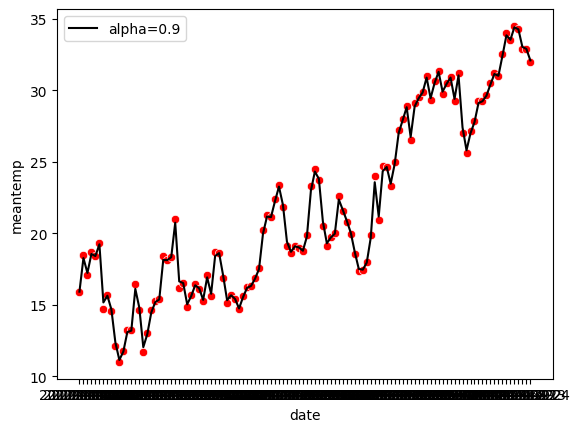

In [44]:
sns.scatterplot(x='date', y='meantemp', data=df, color='red')
plt.plot(df['date'],df['ewma'], label='alpha=0.9', c='black')
plt.legend()
plt.show()